# Association rules - Market items data
##### 2020710058 Applied Data Science Doo-yeong, Lee

- Look into Data
- Preprocessing : OneHotEncoding
- Apriori : Reduce the data
- Association Rule
- Find best item to suggest with 'Wine' and 'Meat'

In [1]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt

df = pd.read_csv('https://gist.githubusercontent.com/Harsh-Git-Hub/2979ec48043928ad9033d8469928e751/raw/72de943e040b8bd0d087624b154d41b2ba9d9b60/retail_dataset.csv', sep=',')

In [2]:
display(df.head(5))
print(df.shape)

,0,1,2,3,4,5,6
0,Bread,Wine,Eggs,Meat,Cheese,Pencil,Diaper
1,Bread,Cheese,Meat,Diaper,Wine,Milk,Pencil
2,Cheese,Meat,Eggs,Milk,Wine,NaN,NaN
3,Cheese,Meat,Eggs,Milk,Wine,NaN,NaN
4,Meat,Pencil,Wine,NaN,NaN,NaN,NaN


(315, 7)


### Check unique items

In [3]:
unique_li = [df[col].unique().tolist() for col in df.columns]
items = set([item for item_li in unique_li for item in item_li if item is not np.NaN ])
items

{'Bagel',
 'Bread',
 'Cheese',
 'Diaper',
 'Eggs',
 'Meat',
 'Milk',
 'Pencil',
 'Wine'}

### OneHotEncoding item_rows

In [4]:
encoded_vals = []

for index, row in df.iterrows():
    labels = {}
    uncommons = list(set(items) - set(row))
    commons = list(set(items).intersection(row))
    for uc_item in uncommons:
        labels[uc_item] = 0
    for com_item in commons:
        labels[com_item] = 1
    encoded_vals.append(labels)

ohe_df = pd.DataFrame(encoded_vals)
display(ohe_df)

,Bagel,Milk,Eggs,Pencil,Bread,Wine,Diaper,Cheese,Meat
0,0,0,1,1,1,1,1,1,1
1,0,1,0,1,1,1,1,1,1
2,0,1,1,0,0,1,0,1,1
3,0,1,1,0,0,1,0,1,1
4,0,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...
310,0,0,1,0,1,0,0,1,0
311,0,1,0,1,0,0,0,0,1
312,0,0,1,1,1,1,1,1,1
313,0,0,0,0,0,0,0,1,1


### Apriori  - Reduce the data

In [5]:
freq_items = apriori(ohe_df, min_support=0.2, use_colnames=True, verbose=1)
display(freq_items.head(7))
display(freq_items.tail(3))

Processing 141 combinations | Sampling itemset size 3


,support,itemsets
0,0.425397,(Bagel)
1,0.501587,(Milk)
2,0.438095,(Eggs)
3,0.361905,(Pencil)
4,0.504762,(Bread)
5,0.438095,(Wine)
6,0.406349,(Diaper)


,support,itemsets
30,0.323810,"(Meat, Cheese)"
31,0.203175,"(Meat, Milk, Cheese)"
32,0.215873,"(Meat, Eggs, Cheese)"


### Max, Min values of Support

In [6]:
display(freq_items.sort_values(by = 'support', ascending=False).head(3))
display(freq_items.sort_values(by = 'support', ascending=False).tail(3))

,support,itemsets
4,0.504762,(Bread)
7,0.501587,(Cheese)
1,0.501587,(Milk)


,support,itemsets
20,0.2,"(Wine, Pencil)"
19,0.2,"(Pencil, Bread)"
29,0.2,"(Diaper, Cheese)"


### Association Rules

In [7]:
rules = association_rules(freq_items, metric="confidence", min_threshold=0.5).sort_values(by = ['lift', 'confidence', 'support'], ascending =False)
print('rules.shape :', rules.shape)
display(rules.head(10))
display(rules.tail(10))

rules.shape : (35, 9)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
29,"(Meat, Milk)",(Cheese),0.244444,0.501587,0.203175,0.831169,1.657077,0.080564,2.952137
32,"(Meat, Eggs)",(Cheese),0.266667,0.501587,0.215873,0.809524,1.613924,0.082116,2.616667
33,"(Meat, Cheese)",(Eggs),0.323810,0.438095,0.215873,0.666667,1.521739,0.074014,1.685714
34,"(Eggs, Cheese)",(Meat),0.298413,0.476190,0.215873,0.723404,1.519149,0.073772,1.893773
31,"(Milk, Cheese)",(Meat),0.304762,0.476190,0.203175,0.666667,1.400000,0.058050,1.571429
12,(Eggs),(Cheese),0.438095,0.501587,0.298413,0.681159,1.358008,0.078670,1.563203
13,(Cheese),(Eggs),0.501587,0.438095,0.298413,0.594937,1.358008,0.078670,1.387202
27,(Meat),(Cheese),0.476190,0.501587,0.323810,0.680000,1.355696,0.084958,1.557540
28,(Cheese),(Meat),0.501587,0.476190,0.323810,0.645570,1.355696,0.084958,1.477891
22,(Diaper),(Wine),0.406349,0.438095,0.234921,0.578125,1.319633,0.056901,1.331922


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
20,(Diaper),(Bread),0.406349,0.504762,0.231746,0.570312,1.129864,0.026636,1.152554
3,(Eggs),(Milk),0.438095,0.501587,0.244444,0.557971,1.112411,0.024701,1.127557
19,(Wine),(Bread),0.438095,0.504762,0.244444,0.557971,1.105414,0.023311,1.120375
4,(Milk),(Bread),0.501587,0.504762,0.279365,0.556962,1.103415,0.026183,1.117823
5,(Bread),(Milk),0.504762,0.501587,0.279365,0.553459,1.103415,0.026183,1.116164
18,(Pencil),(Cheese),0.361905,0.501587,0.200000,0.552632,1.101765,0.018473,1.114099
16,(Pencil),(Bread),0.361905,0.504762,0.200000,0.552632,1.094836,0.017324,1.107003
0,(Bagel),(Milk),0.425397,0.501587,0.225397,0.529851,1.056348,0.012023,1.060116
9,(Meat),(Milk),0.476190,0.501587,0.244444,0.513333,1.023418,0.005593,1.024136
6,(Wine),(Milk),0.438095,0.501587,0.219048,0.500000,0.996835,-0.000695,0.996825


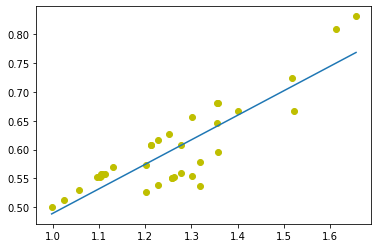

In [8]:
fit = np.polyfit(rules['lift'], rules['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.plot(rules['lift'], rules['confidence'], 'yo', rules['lift'], fit_fn(rules['lift']))

### Which item should we recommend with  'Wine' and 'Meat'?

In [9]:
rules.iloc[0,0]

frozenset({'Meat', 'Milk'})

In [10]:
rules[rules['antecedents']==frozenset({'Wine'})].sort_values(by = 'lift', ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
21,(Wine),(Diaper),0.438095,0.406349,0.234921,0.536232,1.319633,0.056901,1.280060
10,(Wine),(Eggs),0.438095,0.438095,0.241270,0.550725,1.257089,0.049342,1.250691
23,(Wine),(Cheese),0.438095,0.501587,0.269841,0.615942,1.227986,0.050098,1.297754
25,(Wine),(Meat),0.438095,0.476190,0.250794,0.572464,1.202174,0.042177,1.225182
19,(Wine),(Bread),0.438095,0.504762,0.244444,0.557971,1.105414,0.023311,1.120375
6,(Wine),(Milk),0.438095,0.501587,0.219048,0.500000,0.996835,-0.000695,0.996825


In [11]:
rules[rules['antecedents']==frozenset({'Meat'})].sort_values(by = 'lift', ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
27,(Meat),(Cheese),0.47619,0.501587,0.323810,0.680000,1.355696,0.084958,1.557540
14,(Meat),(Eggs),0.47619,0.438095,0.266667,0.560000,1.278261,0.058050,1.277056
26,(Meat),(Wine),0.47619,0.438095,0.250794,0.526667,1.202174,0.042177,1.187123
9,(Meat),(Milk),0.47619,0.501587,0.244444,0.513333,1.023418,0.005593,1.024136
